# Decision Tree Classification with Python and Scikit-Learn


In this project, I build a Decision Tree Classifier to predict the safety of the car. I build two models, one with criterion `gini index` and another one with criterion `entropy`. I implement Decision Tree Classification with Python and Scikit-Learn. I have used the **Car Evaluation Data Set** for this project, downloaded from the UCI Machine Learning Repository website.

## Table of Contents


1.	Introduction to Decision Tree algorithm
2.	Classification and Regression Trees
3.	Decision Tree algorithm intuition
4.	Attribute selection measures
    - Information gain
    - Gini index
5.	The problem statement
6.	Dataset description
7.	Import libraries
8.	Import dataset
9.	Exploratory data analysis
10.	Declare feature vector and target variable
11.	Split data into separate training and test set
12.	Feature engineering
13.	Decision Tree classifier with criterion gini-index
14.	Decision Tree classifier with criterion entropy
15.	Confusion matrix
16.	Classification report
17.	Results and conclusion


## 1. Introduction to Decision Tree algorithm


A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes. 


A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node. 


## 2. Classification and Regression Trees (CART)


Nowadays, Decision Tree algorithm is known by its modern name **CART** which stands for **Classification and Regression Trees**.
Classification and Regression Trees or **CART** is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees.


In this project, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem. 


## 3. Decision Tree algorithm intuition

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. The intuition behind the Decision-Tree algorithm is very simple to understand.


The Decision Tree algorithm intuition is as follows:-


1.	For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node. 

2.	For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

3.	This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.


## 4. Attribute selection measures


The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the **attributes selection**. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.


There are 2 popular attribute selection measures. They are as follows:-


- **Information gain**

- **Gini index**


While using **Information gain** as a criterion, we assume attributes to be categorical and for **Gini index** attributes are assumed to be continuous. These attribute selection measures are described below.


### Information gain


By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called **Entropy**. 


Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. **Information gain** is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. 


The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in **entropy measure** of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.


### Gini index


Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index**. It uses the Gini method to create split points. 

Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split

1.	Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).

2.	Calculate Gini for split using weighted Gini score of each node of that split.


In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.


## 5. The problem statement


The problem is to predict the safety of the car. In this project, I build a Decision Tree Classifier to predict the safety of the car. I implement Decision Tree Classification with Python and Scikit-Learn. I have used the **Car Evaluation Data Set** for this project, downloaded from the UCI Machine Learning Repository website.


## 6. Dataset description


I have used the **Car Evaluation Data Set** downloaded from the Kaggle website. I have downloaded this data set from the Kaggle website. The data set can be found at the following url:-


http://archive.ics.uci.edu/ml/datasets/Car+Evaluation


Car Evaluation Database was derived from a simple hierarchical decision model originally developed for expert system for decision making. The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety. 

It was donated by Marko Bohanec.

## 7. Import libraries

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [330]:
import warnings

warnings.filterwarnings('ignore')

# Download dataset

In [331]:
!wget https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv

--2023-03-02 14:13:15--  https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53593 (52K) [text/plain]
Saving to: ‘car_evaluation.csv.9’

car_evaluation.csv. 100%[===================>]  52.34K  --.-KB/s    in 0.01s   

2023-03-02 14:13:15 (4.84 MB/s) - ‘car_evaluation.csv.9’ saved [53593/53593]



## 8. Import dataset

In [332]:
data = 'car_evaluation.csv'

df = pd.read_csv(data, header=None)

## 9. Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

In [333]:
# view dimensions of dataset

df.shape

(1728, 7)

We can see that there are 1728 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [334]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [335]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [336]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [338]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   


vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [339]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [340]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

In [341]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['buying'] = lb.fit_transform(df['buying'].values)
df['maint'] = lb.fit_transform(df['maint'].values)
df['persons'] = lb.fit_transform(df['persons'].values)
df['doors'] = lb.fit_transform(df['doors'].values)
df['lug_boot'] = lb.fit_transform(df['lug_boot'].values)
df['safety'] = lb.fit_transform(df['safety'].values)




## 10. Declare feature vector and target variable

In [342]:
X = df.drop(['class'], axis=1)

y = df['class']

## 11. Split data into separate training and test set

In [343]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [344]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

## 12. Feature Engineering


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [345]:
# check data types in X_train

X_train.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object

### Encode categorical variables


Now, I will encode the categorical variables.

In [346]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,3,3,1,2,1,1
468,0,3,1,1,2,1
155,3,0,1,2,2,0
1721,1,1,3,2,2,0
1208,2,1,0,2,2,0


We can see that all  the variables are ordinal categorical data type.

In [347]:
"""#Install library --upgrade category_encoders
%pip install --upgrade category_encoders

# import category encoders


import category_encoders as ce"""

'#Install library --upgrade category_encoders\n%pip install --upgrade category_encoders\n\n# import category encoders\n\n\nimport category_encoders as ce'

In [348]:
"""# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)"""

"# encode variables with ordinal encoding\n\nencoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])\n\n\nX_train = encoder.fit_transform(X_train)\n\nX_test = encoder.transform(X_test)"

In [349]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,3,3,1,2,1,1
468,0,3,1,1,2,1
155,3,0,1,2,2,0
1721,1,1,3,2,2,0
1208,2,1,0,2,2,0


In [350]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,0,0,2,0,1,0
1201,2,1,0,1,1,2
628,0,0,3,0,0,2
1498,1,0,3,1,1,2
1263,2,1,2,2,1,1


We now have training and test set ready for model building. 

## 13. Decision Tree Classifier with criterion gini index

In [351]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier


In [352]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

### Predict the Test set results with criterion gini index

In [353]:
y_pred_gini = clf_gini.predict(X_test)


### Check accuracy score with criterion gini index

In [354]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7653


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [355]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [356]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7744


### Check for overfitting and underfitting

In [357]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))


#Sebelum Training set score: 0.8557
#Test set score: 0.8651

Training set score: 0.7744
Test set score: 0.7653


Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


## 14. Decision Tree Classifier with criterion entropy

In [358]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [359]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [360]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7653


### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [361]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'acc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [362]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7744


### Check for overfitting and underfitting

In [363]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

#Sebelum
#Training set score: 0.8557
#Test set score: 0.8651


Training set score: 0.7744
Test set score: 0.7653


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

## 15. Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [364]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[ 50   0  79   0]
 [  9   0  11   0]
 [ 10   0 387   0]
 [ 25   0   0   0]]


## 16. Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [365]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.53      0.39      0.45       129
        good       0.00      0.00      0.00        20
       unacc       0.81      0.97      0.89       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.77       571
   macro avg       0.34      0.34      0.33       571
weighted avg       0.68      0.77      0.72       571



## 17. Results and conclusion


1.	In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion `gini index` and another one with criterion `entropy`. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.
2.	In the model with criterion `gini index`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.
3.	Similarly, in the model with criterion `entropy`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.We get the same values as in the case with criterion `gini`. So, there is no sign of overfitting.
4.	In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
5.	The confusion matrix and classification report yields very good model performance.

In [366]:
"""Exporting Decision Tree to the text representation can be useful when working on applications whitout user interface
or when we want to log information about the model into the text file.
You can check details about export_text in the sklearn"""

from sklearn import tree

text_representation = tree.export_text(clf_gini)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- class: unacc
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: acc
|   |   |--- feature_1 >  2.50
|   |   |   |--- class: unacc
|   |--- feature_5 >  0.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- class: unacc
|   |   |--- feature_5 >  1.50
|   |   |   |--- class: unacc



In [367]:
#f you want to save it to the file, it can be done with following code:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)


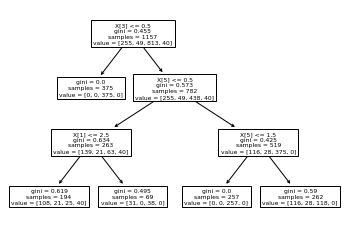

In [368]:
#The code below plots a decision tree using scikit-learn.

from sklearn import tree

tree.plot_tree(clf_gini);

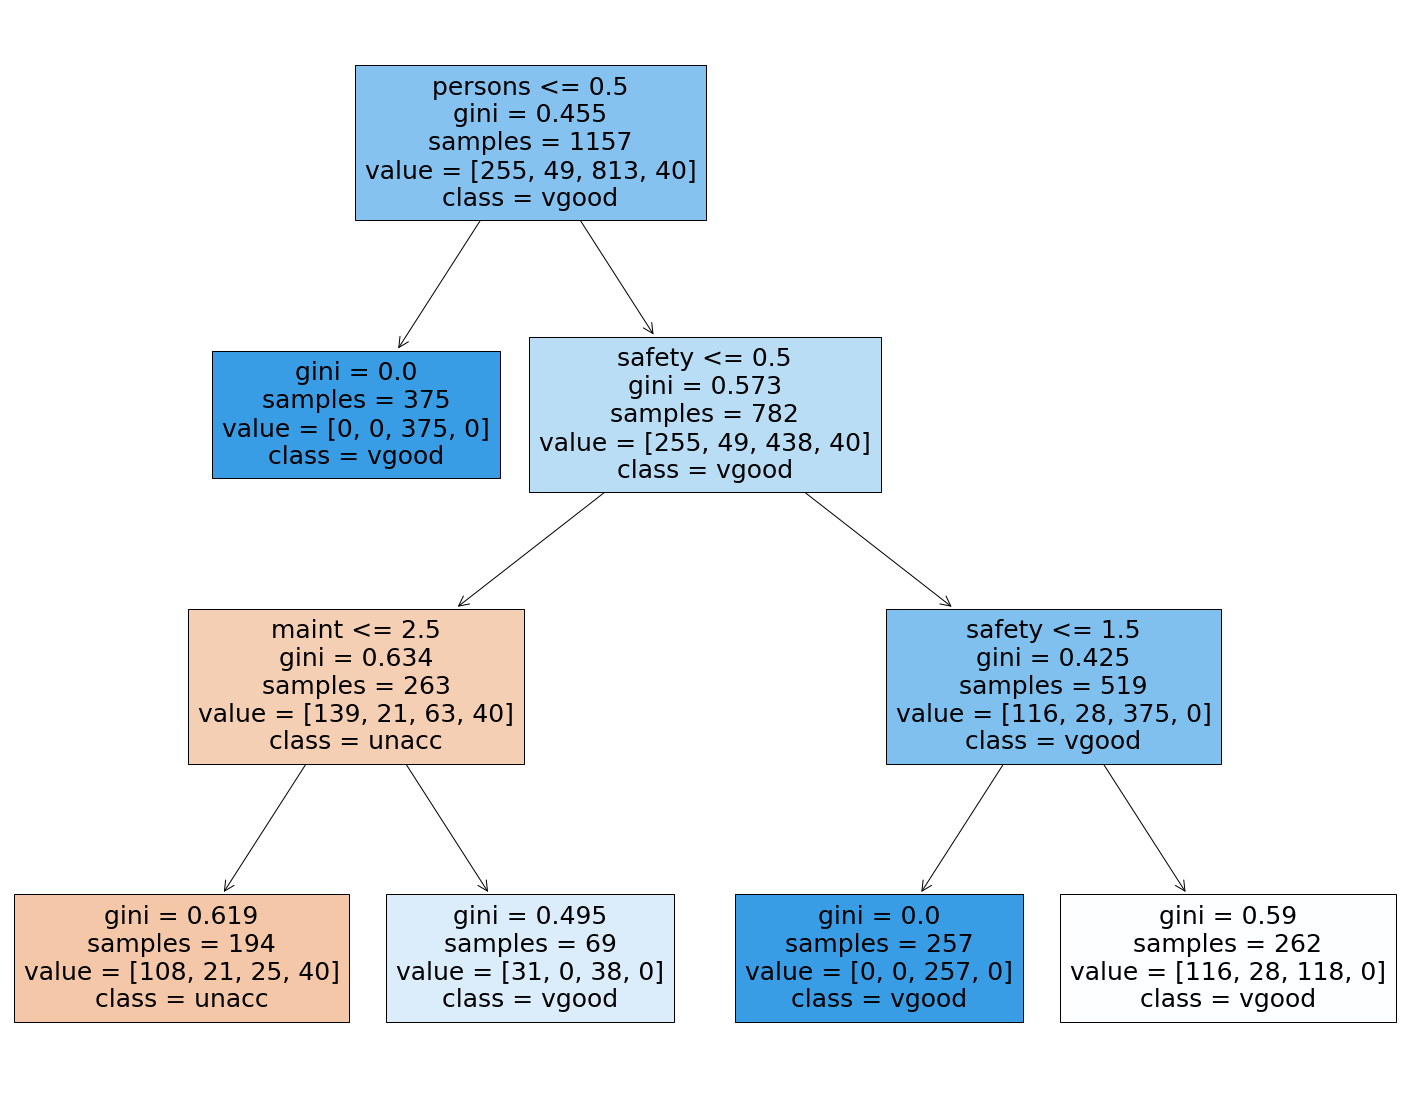

In [369]:
"""The plot_tree method was added to sklearn in version 0.21. It requires matplotlib to be installed. 
It allows us to easily produce figure of the tree (without intermediate exporting to graphviz) 
The more information about plot_tree arguments are in the docs."""

feature_name = df.columns[:6]
target_names = df['class'].unique().tolist()



fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 
                   feature_names=feature_name,  
                   class_names=target_names,
                   filled=True)





In [370]:
#Menyimpan figure
fig.savefig("decistion_tree.png")